In [0]:
''' IMPORTING LIBRARIES '''
import csv    
import gzip
import os
import glob
import pickle
import re
import sys
import time
import multiprocessing as mp         # for handling multi-processing applications
import platform
from tqdm import tnrange, tqdm_notebook

import numpy as np
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
figsize(8, 8)
from pandas import DataFrame, Series # how to import something from another module into current namespace
import pandas as pd
import cv2

# Libraries for plotting
## plot figures inside the notebook
%matplotlib inline               
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [0]:
main_dir = '/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
''' PRINTING A SAMPLE SINGLE-TRIAL SINGLE-SUBJECT CSV '''

df = pd.read_csv('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN/co2c0000347_79.csv')
print(df)

      alcoholic\tchan_name\tepoch\tstimulus\tsubject_id\ttrial_num\tvoltage
0      False\tFP1\t0\tS2 match \tco2c0000347\t79\t-2.665                   
1      False\tFP1\t1\tS2 match \tco2c0000347\t79\t-5.107                   
2      False\tFP1\t2\tS2 match \tco2c0000347\t79\t-5.595                   
3      False\tFP1\t3\tS2 match \tco2c0000347\t79\t-3.153                   
4      False\tFP1\t4\tS2 match \tco2c0000347\t79\t-0.712                   
...                                                  ...                   
16379   False\tY\t251\tS2 match \tco2c0000347\t79\t6.938                   
16380   False\tY\t252\tS2 match \tco2c0000347\t79\t8.891                   
16381  False\tY\t253\tS2 match \tco2c0000347\t79\t10.356                   
16382  False\tY\t254\tS2 match \tco2c0000347\t79\t11.332                   
16383  False\tY\t255\tS2 match \tco2c0000347\t79\t11.820                   

[16384 rows x 1 columns]


In [0]:
os.chdir('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN')

In [0]:
''' STORING PICKLE FILES GENERATED FOR EASY ACCESS '''
alcoholics = [file for file in glob.glob('co?a*pkl')]
controls = [file for file in glob.glob('co?c*pkl')] 

In [0]:
print('There are {} alcoholic and {} control subjects'.format(str(len(alcoholics)),str(len(controls))))

There are 10 alcoholic and 10 control subjects


**WORKING WITH A SINGLE ALCOHOLIC AND CONTROL FILE**

In [0]:
al_df = pd.read_pickle(alcoholics[2])           ## load into memory as a dataframe object
co_df = pd.read_pickle(controls[2])

print(al_df)

        alcoholic chan_name  epoch  ... trial_num voltage  norm_voltage
0            True       FP1      0  ...         0   5.015      0.911321
1            True       FP1      1  ...         0   5.503      1.000000
2            True       FP1      2  ...         0   4.039      0.733963
3            True       FP1      3  ...         0   2.085      0.378884
4            True       FP1      4  ...         0   0.132      0.023987
...           ...       ...    ...  ...       ...     ...           ...
491515       True         Y    251  ...        71   3.042      0.861756
491516       True         Y    252  ...        71   3.530      1.000000
491517       True         Y    253  ...        71   2.553      0.723229
491518       True         Y    254  ...        71  -0.376     -0.009303
491519       True         Y    255  ...        71  -4.771     -0.118050

[491520 rows x 8 columns]


In [0]:
''' sample alcoholic pickle file '''
al_df.head(20)

,alcoholic,chan_name,epoch,stimulus,subject_id,trial_num,voltage,norm_voltage
0,True,FP1,0,S1 obj,co2a0000368,0,5.015,0.911321
1,True,FP1,1,S1 obj,co2a0000368,0,5.503,1.000000
2,True,FP1,2,S1 obj,co2a0000368,0,4.039,0.733963
3,True,FP1,3,S1 obj,co2a0000368,0,2.085,0.378884
4,True,FP1,4,S1 obj,co2a0000368,0,0.132,0.023987
5,True,FP1,5,S1 obj,co2a0000368,0,0.132,0.023987
6,True,FP1,6,S1 obj,co2a0000368,0,0.621,0.112848
7,True,FP1,7,S1 obj,co2a0000368,0,0.621,0.112848
8,True,FP1,8,S1 obj,co2a0000368,0,0.132,0.023987
9,True,FP1,9,S1 obj,co2a0000368,0,-0.356,-0.022978


In [0]:
''' sample control pickle file '''

co_df.head(20)

,alcoholic,chan_name,epoch,stimulus,subject_id,trial_num,voltage,norm_voltage
0,False,FP1,0,S1 obj,co2c0000339,0,3.092,0.260226
1,False,FP1,1,S1 obj,co2c0000339,0,4.069,0.342451
2,False,FP1,2,S1 obj,co2c0000339,0,4.557,0.383521
3,False,FP1,3,S1 obj,co2c0000339,0,5.046,0.424676
4,False,FP1,4,S1 obj,co2c0000339,0,5.534,0.465747
5,False,FP1,5,S1 obj,co2c0000339,0,6.022,0.506817
6,False,FP1,6,S1 obj,co2c0000339,0,6.022,0.506817
7,False,FP1,7,S1 obj,co2c0000339,0,6.022,0.506817
8,False,FP1,8,S1 obj,co2c0000339,0,6.510,0.547888
9,False,FP1,9,S1 obj,co2c0000339,0,6.999,0.589042


In [0]:
''' Type of possible values for each column '''

print("chan_name  -->  {}".format(al_df.chan_name.unique()))
print("subject_id  -->  {}".format(al_df.subject_id.unique()))
print("trial_num  -->  {}".format(al_df.trial_num.unique()))
print("stimulus  -->  {}".format(al_df.stimulus.unique()))

chan_name  -->  ['FP1' 'FP2' 'F7' 'F8' 'AF1' 'AF2' 'FZ' 'F4' 'F3' 'FC6' 'FC5' 'FC2' 'FC1'
 'T8' 'T7' 'CZ' 'C3' 'C4' 'CP5' 'CP6' 'CP1' 'CP2' 'P3' 'P4' 'PZ' 'P8' 'P7'
 'PO2' 'PO1' 'O2' 'O1' 'X' 'AF7' 'AF8' 'F5' 'F6' 'FT7' 'FT8' 'FPZ' 'FC4'
 'FC3' 'C6' 'C5' 'F2' 'F1' 'TP8' 'TP7' 'AFZ' 'CP3' 'CP4' 'P5' 'P6' 'C1'
 'C2' 'PO7' 'PO8' 'FCZ' 'POZ' 'OZ' 'P2' 'P1' 'CPZ' 'nd' 'Y']
subject_id  -->  ['co2a0000368']
trial_num  -->  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 27 29 31 33 35
 37 41 47 51 65 71]
stimulus  -->  ['S1 obj ' 'S2 nomatch' 'S2 match ']


In [0]:
print("chan_name  -->  {}".format(co_df.chan_name.unique()))
print("subject_id  -->  {}".format(co_df.subject_id.unique()))
print("trial_num  -->  {}".format(co_df.trial_num.unique()))
print("stimulus  -->  {}".format(co_df.stimulus.unique()))

chan_name  -->  ['FP1' 'FP2' 'F7' 'F8' 'AF1' 'AF2' 'FZ' 'F4' 'F3' 'FC6' 'FC5' 'FC2' 'FC1'
 'T8' 'T7' 'CZ' 'C3' 'C4' 'CP5' 'CP6' 'CP1' 'CP2' 'P3' 'P4' 'PZ' 'P8' 'P7'
 'PO2' 'PO1' 'O2' 'O1' 'X' 'AF7' 'AF8' 'F5' 'F6' 'FT7' 'FT8' 'FPZ' 'FC4'
 'FC3' 'C6' 'C5' 'F2' 'F1' 'TP8' 'TP7' 'AFZ' 'CP3' 'CP4' 'P5' 'P6' 'C1'
 'C2' 'PO7' 'PO8' 'FCZ' 'POZ' 'OZ' 'P2' 'P1' 'CPZ' 'nd' 'Y']
subject_id  -->  ['co2c0000339']
trial_num  -->  [ 0  4  5  6  7  8 12 19 20 22 25 29 30 33 34 35 36 37 39 41 43 47 49 53
 55 65 71 75 77 79]
stimulus  -->  ['S1 obj ' 'S2 nomatch' 'S2 match ']


There are three different stimulus applied during the various trials: ['S1 obj ' 'S2 nomatch' 'S2 match ']

However, in some subjects, the following extra values are also present- ['S2 nomatch err', 'S2 match err ']

Therefore, we need to remove those entries

## SURFACE PLOTS

Depicting voltage variation across all the channels for a particular stimulus for one subject each from Alcoholics and Control.

In [0]:
''' defining the necessary functions '''

def make_matrix(df_obj,trial_num=5):
    """
        This function returns voltage values in the form of matrix with shape
        64 X 256, corresponding to 64 channels.
        Args:
        df_obj: Dataframe object containing all the trial information
        trial_num: The trial number for which the plot need to be made
        Return:
        z with shape (64,256) containing the voltages for the trial
    """
    df = df_obj.loc[(df_obj["trial_num"] == trial_num)]
    chan_names = df_obj.chan_name.unique()
    z=[]
    for idx,chanel in enumerate(chan_names):
        voltages_values = df.loc[df['chan_name']== chanel]['norm_voltage'].values
        z.append(voltages_values)
    z = np.asarray(z)
    return z.reshape(64,256)

def make_surface_plot(X,Y,Z_al,Z_co,figtit):
    """
    Make surface plots with a colormap representing
    the voltage values
    """
    fig = plt.figure()
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X,Y, Z_al, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax.set_xlabel('epoch')
    ax.set_ylabel('channels')
    ax.set_zlabel('Voltages(micro volts)')
    ax.text2D(0.05,0.95, "Alcoholic "+figtit,transform=ax.transAxes)

    #fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.view_init(elev=40., azim=320)

    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    
    surf1 = ax1.plot_surface(X,Y, Z_co, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('channels')
    ax1.set_zlabel('Voltages(micro volts)')
    ax1.text2D(0.05,0.95, "Control "+figtit,transform=ax1.transAxes)
    ax1.view_init(elev=40., azim=320)
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    cax = fig.add_axes([0.49, 0.1, 0.03, 0.8])
    fig.colorbar(surf1,cax=cax)
    fig.set_size_inches(20,8)
    plt.show()

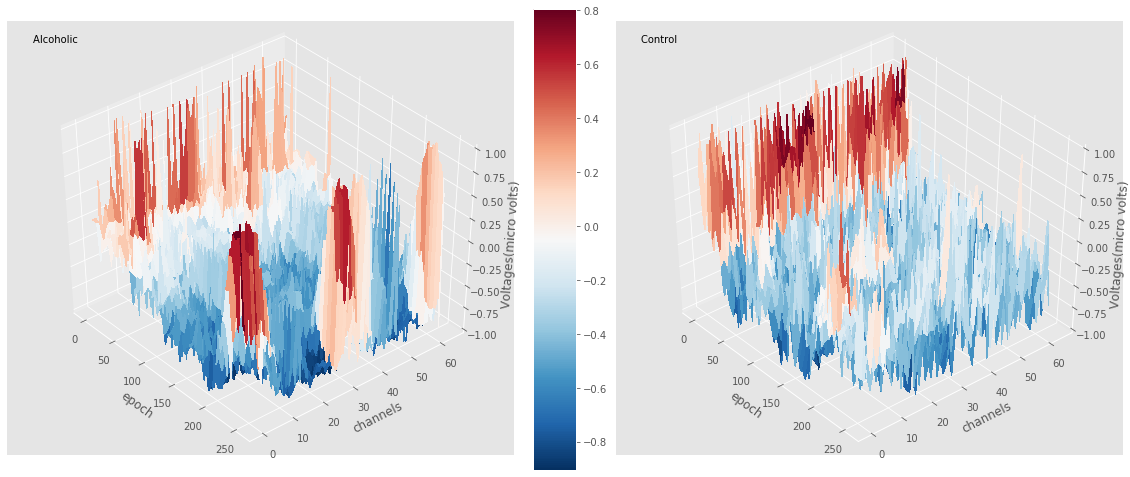

In [0]:
''' plotting '''

X = np.arange(0, 256, 1)
Y = np.arange(0,64, 1)
Z_al = make_matrix(al_df)
Z_co = make_matrix(co_df)
make_surface_plot(X,Y,Z_al,Z_co,'')

This was for a single trial. The only information that we can get out of it is that in the alcoholic subject, voltages are towards positive end and in the control subject, towards the negative. But it isn't right to make conclusions based on a single trial.


A much more sensible thing to do would be to average over all the trials containing a particular stimulus and make the same surface plot.

In [0]:
def matrix_stimulus(df_obj,stimulus):
    """
        Returns averaged voltage in the form of a matrix across all
        the trials of a subject for one single stimulus
    """
    stimuli_df = df_obj.loc[df_obj['stimulus'] == stimulus ]

    chan_names = df_obj.chan_name.unique()
    Z = np.zeros((64,256))
    for epoch in range(0,255):
        epoch_df = stimuli_df.loc[stimuli_df['epoch'] == epoch]
        epoch_voltage=[]
        for chanel in chan_names:
            voltages_values = epoch_df.loc[epoch_df['chan_name']== chanel]['norm_voltage'].values
            mean_volt = sum(voltages_values)/len(voltages_values)
            epoch_voltage.append(mean_volt)
        Epoch_voltage = np.asarray(epoch_voltage)
    
        Z[:,epoch] = Epoch_voltage
        
    return Z

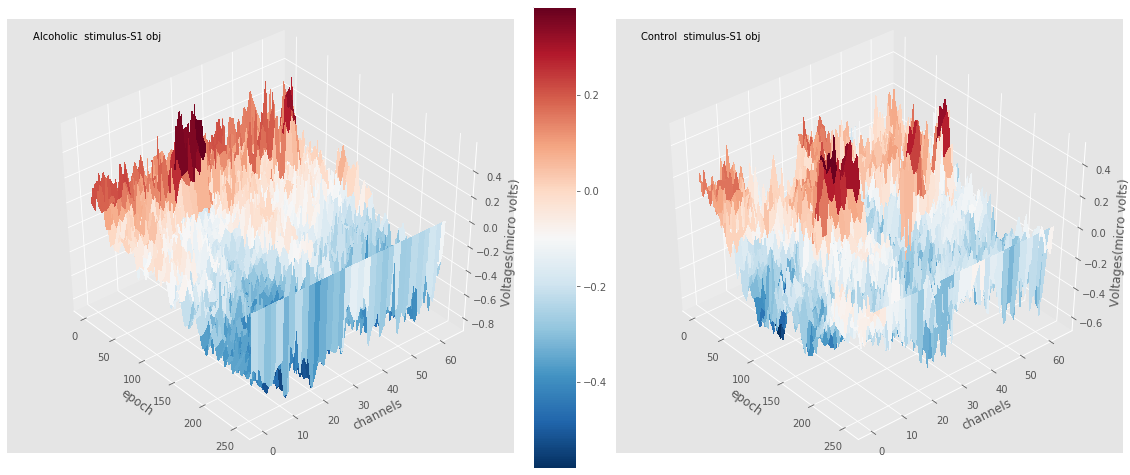

In [0]:
X = np.arange(0, 256, 1)
Y = np.arange(0,64, 1)
Z_al = matrix_stimulus(al_df,'S1 obj ')
Z_co = matrix_stimulus(co_df,'S1 obj ')
make_surface_plot(X,Y,Z_al,Z_co,' stimulus-S1 obj')

Checking for another stimulus


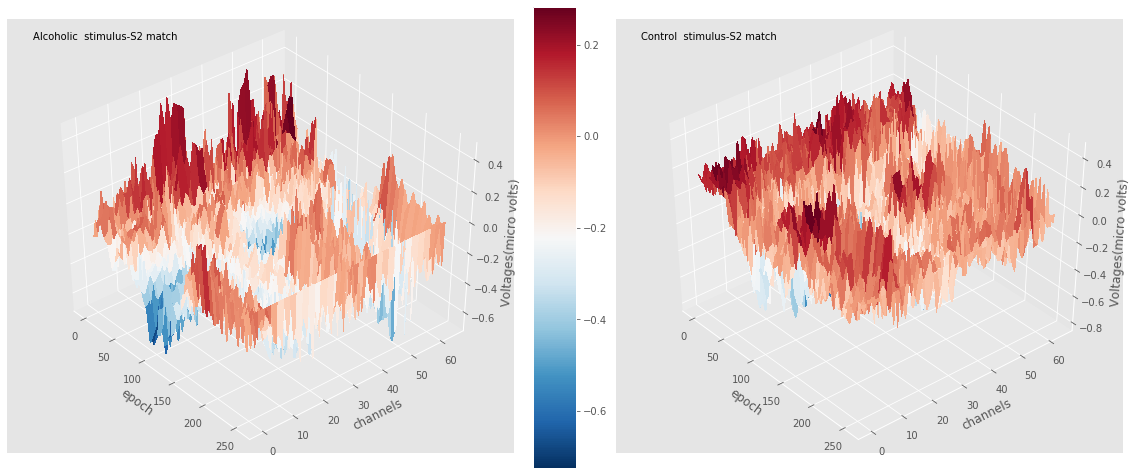

In [0]:
Z_al = matrix_stimulus(al_df,'S2 match ')
Z_co = matrix_stimulus(co_df,'S2 match ')
make_surface_plot(X,Y,Z_al,Z_co,' stimulus-S2 match')

**One major difference which is visible is that for the alcoholic subject there is a pickup in eeg voltages towards the end of the trial whereas for the control subject, we observe a steady decrease in most channels as time increases, except for few channels where a constant level is maintained.**

## Heatmaps

Seeing the difference between alcoholic and control subject in the voltage changes across channels and time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


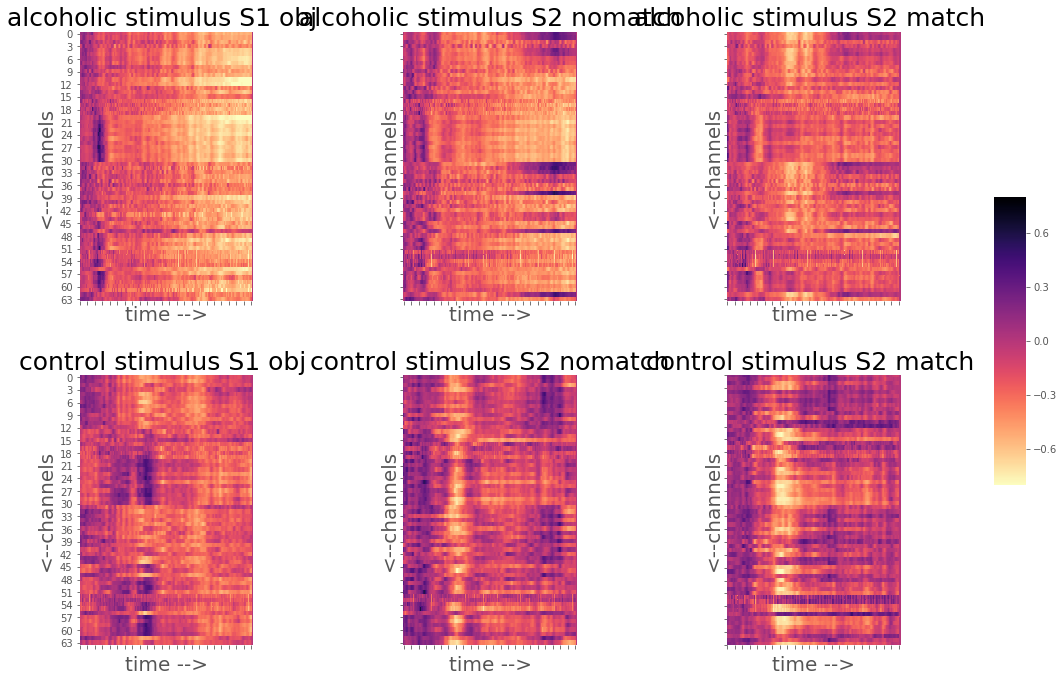

In [0]:
fig, axes = plt.subplots(2,3,figsize=(15,10), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(6):
    if i>=3:
        df = co_df
        tit_str = 'control'
    elif i<3:
        df = al_df
        tit_str = 'alcoholic'
    row = i// 3
    col = i % 3
    ax_curr = axes[row,col]
    stimulus = ['S1 obj ', 'S2 nomatch', 'S2 match ','S1 obj ', 'S2 nomatch', 'S2 match ']
    Z = matrix_stimulus(df,stimulus[i])
    sns.set(font_scale=2)
    sns.heatmap(Z,ax=ax_curr, cmap='magma_r',vmin=-0.8 , vmax=0.8,label='big',
               cbar=i ==0,
               cbar_ax=None if i else cbar_ax)
    ax_curr.set_title(tit_str+' stimulus '+stimulus[i],fontsize=25)
    ax_curr.set(xticklabels=[])
    ax_curr.set_xlabel('time -->',size=20)
    ax_curr.set_ylabel('<--channels',size=20)
fig.tight_layout(rect=[0,0,.9,1])

## Headmaps

Headmaps map the locations of the eeg electrodes to their respective locations on the head. By doing so we would get a much detailed information about the differences between the alcoholic subject and the control subject.

Some questions to ask..
- Which areas of the brain react more strongly to each stimulus
- Are these areas different in the case of alcoholics and controls
- Which areas of the brain fire together after each stimulus

Load sensor locations and plot it in a 'top head' representation.

In [0]:
''' 
We use BESA-81 to load sensor information. It consists of the channel names and their respective locations.
'''

sensors = pd.read_csv('https://gist.githubusercontent.com/ishitamed19/490c6cb47cf9f6e88c8ed1c4cd2f3bab/raw/46635317fb144de18ddeec65c315e6f776b1cbd1/besa-61.csv', sep=',', header=None)
sensors.columns = ['chan_name','yy','xx','zz']
print(sensors)
sensors.chan_name.unique()

   chan_name        yy        xx        zz
0        FP1 -0.308829  0.950477 -0.034899
1        FPZ  0.000000  0.999391 -0.034899
2        FP2  0.308829  0.950477 -0.034899
3        AF7 -0.615286  0.787531 -0.034899
4        AF1 -0.196584  0.924857  0.325568
..       ...       ...       ...       ...
56       PO2  0.196584 -0.924857  0.325568
57       PO8  0.587427 -0.808524 -0.034899
58        O1 -0.308829 -0.950477 -0.034899
59        OZ  0.000000 -0.999391 -0.034899
60        O2  0.308829 -0.950477 -0.034899

[61 rows x 4 columns]


array(['FP1', 'FPZ', 'FP2', 'AF7', 'AF1', 'AFZ', 'AF2', 'AF8', 'F7', 'F5',
       'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3',
       'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1',
       'C2', 'CZ', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ',
       'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2',
       'P4', 'P6', 'P8', 'PO7', 'PO1', 'POZ', 'PO2', 'PO8', 'O1', 'OZ',
       'O2'], dtype=object)

In [0]:
def label_point(x,y,val,ax):
    a = pd.concat({'x':x, 'y':y, 'val':val}, axis=1)
    for i,point in a.iterrows():
        ax.text(point['x'],point['y'],str(point['val']))

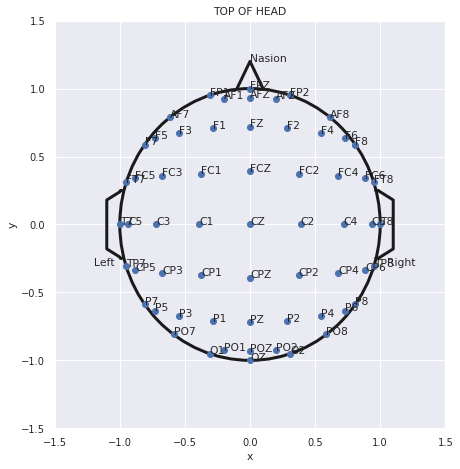

In [0]:
import importlib
importlib.reload(plt)
sns.set(font_scale=0.9)
fig = plt.figure(figsize=(7,7.5))
ax1 = sensors.set_index('yy')['xx'].plot(style='o')
label_point(sensors.yy,sensors.xx,sensors.chan_name,ax1)
plt.axis([-1.5,1.5,-1.5,1.5])
earX_left=[-0.985,-0.995,-1.0,-1.1,-1.1,-1.0,-0.995,-0.985]
earY_left=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
earX_right=[0.965,0.985,1.0,1.1,1.1,1.0,0.985,0.965]
earY_right=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
noseX = [-0.10,-0.05,0.00,0.05,0.10]
noseY = [1.0,1.1,1.2,1.1,1.0]
plt.plot(earX_left,earY_left,earX_right,earY_right,noseX,noseY,color='k',linewidth = 3)
circ = plt.Circle((0,0), radius=1, fc='y',color='k', fill=False, linewidth = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TOP OF HEAD')
plt.text(-1.2,-0.3,'Left')
plt.text(1.05,-0.3,'Right')
plt.text(0,1.2,'Nasion')
plt.gca().add_patch(circ)
plt.show()

**This plot shows the placement of the electrode channels**


In the above diagram, 61 electrodes are marked, showing their positions over a headmap. Out of 64 original electrodes from the data, the positions of electrodes 'X','Y' and 'nd' could not be ascertained and hence they are omitted. For the rest of the section, we will only take information from 61 electrodes present here and ignore the other three.

**Now we will print some heatmaps for better visualisation**

In [0]:
import scipy.interpolate
#create x,y mesh for the image.
def interpolate_mesh(sensorData,z):
    """This function will take the voltage across the channels
        and map them into electrode postions to create a interpolated
        2D color map"""
    x = sensorData.yy
    y = sensorData.xx
    xi,yi = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
    x0,y0,radius = 0.0,0.0,0.90
    xi,yi = np.meshgrid(xi,yi)
    r = np.sqrt((xi-x0)**2 + (yi-y0)**2)
    inside  = r<radius
    rbf = scipy.interpolate.Rbf(x,y,z, function='linear')
    zi = rbf(xi[inside],yi[inside])
    return inside,xi,yi,zi

In [0]:
def plot_head(ax,mask,xx,yy,zz,stimuli_name,sensorData,MIN=None,MAX=None):
    """This function will plot the interpolated colormap over the headmap
        for three different stimulus"""
    if MIN and MAX is None:
        MIN=-1
        MAX=1
    ax.scatter(xx[mask],yy[mask],c=zz,cmap='RdBu_r',vmin=MIN,vmax=MAX)
    #plt.axis([-1.5,1.5,-1.5,1.5])
    earX_left=[-0.985,-0.995,-1.0,-1.1,-1.1,-1.0,-0.995,-0.985]
    earY_left=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
    earX_right=[0.965,0.985,1.0,1.1,1.1,1.0,0.985,0.965]
    earY_right=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
    noseX = [-0.10,-0.05,0.00,0.05,0.10]
    noseY = [1.0,1.1,1.2,1.1,1.0]
    ax.plot(earX_left,earY_left,earX_right,earY_right,noseX,noseY,color='k',linewidth = 2)
    circ = plt.Circle((0,0), radius=1, fc='y',color='k', fill=False, linewidth = 2)
    ax.add_artist(circ)
    x = sensorData.yy
    y = sensorData.xx
    ax.scatter(x,y,color='k',s=3)
    ax.set_ylim([-1.5,1.5])
    ax.set_xlim([-1.5,1.5])
    ax.set_title(stimuli_name)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])

In [0]:
def avgVolt_stimulus(df_obj,sensorData,epoch_no):   
    """This function averages the voltages across all the trials with the same stimulus
        for a single epoch"""
    epoch_df = df_obj.loc[df_obj['epoch'] == epoch_no]
    epoch_voltage = []
    chan_names = sensorData.chan_name.unique()
    norm_voltage = []
    subID = df_obj.iloc[0]['subject_id']
    stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
    for stimuli in stimulus:
        stimuli_df = epoch_df.loc[epoch_df['stimulus'] == stimuli]
        for chanel in chan_names:
            voltages_values = stimuli_df.loc[stimuli_df['chan_name']== chanel]['voltage'].values
            mean_volt = sum(voltages_values)/len(voltages_values)
            epoch_voltage.append(mean_volt)
    epoch_voltage = np.asarray(epoch_voltage)
    epoch_voltage = epoch_voltage.reshape(61,3)
    
    return epoch_voltage,subID

In [0]:
import matplotlib.gridspec as gridspec

    
def heatmap_headmap(df_obj,sensorData,epoch_no):
        """Function to create plots for each of the 256 epochs. Each plot
           will create a heatmap showing voltages for the three stimulus
           and a headmap showing voltages across three stimulus
        """
        voltmatrix,subID = avgVolt_stimulus(df_obj,sensorData,epoch_no)

        fig = plt.figure(1,figsize=(6.5,5.5))
        gridspec.GridSpec(3,3)

        #1
        plt.subplot2grid((3,3),(0,0), colspan=2,rowspan=3)
        ax = sns.heatmap(voltmatrix, xticklabels=stimulus,cmap='RdBu_r', vmin=-1, vmax=1)
        ax.set(yticklabels=[])
        ax.set(xlabel='stimulus', ylabel='<-- channels')
        ax.set_title('sub '+str(subID)+' Epoch '+str(epoch_no).zfill(3))
        #2
        ax1 = plt.subplot2grid((3,3),(0,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,0])
        snapPlots = plot_head(ax1,mask,xi,yi,zi,stimulus[0],sensorData)
        #3
        ax2 = plt.subplot2grid((3,3),(1,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,1])
        snapPlots = plot_head(ax2,mask,xi,yi,zi,stimulus[1],sensorData)
        #4
        ax3 = plt.subplot2grid((3,3),(2,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,2])
        snapPlots = plot_head(ax3, mask,xi,yi,zi,stimulus[2],sensorData)

        fig.tight_layout()
        fig.savefig(subID+'_Epoch_eegSensors_'+str(epoch_no).zfill(4)+'.png')

In [0]:
def headmap_stacked(df_obj_al,df_obj_co,sensorData,epoch):
    """
        Call previous functions to create the final product.
    """
    
    voltmatrix_al,subID = avgVolt_stimulus(df_obj_al,sensorData,epoch) 
    voltmatrix_co,subID = avgVolt_stimulus(df_obj_co,sensorData,epoch)
    stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
    fig,axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
    for idx in range(6):
        row = idx// 3
        col = idx % 3
        if row >= 1:
            mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix_co[:,col])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'control '+stimulus[col],sensors)
        elif row < 1:
            mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix_al[:,col])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'alcoholic '+stimulus[col],sensors)
        
        
        
    fig.suptitle('Alcoholic and Control headmaps Epoch '+str(epoch).zfill(4))
    fig.tight_layout(rect=[0,0.03,1,0.95])
        
    fig.savefig('headmapStack_'+str(epoch).zfill(4)+'.png')

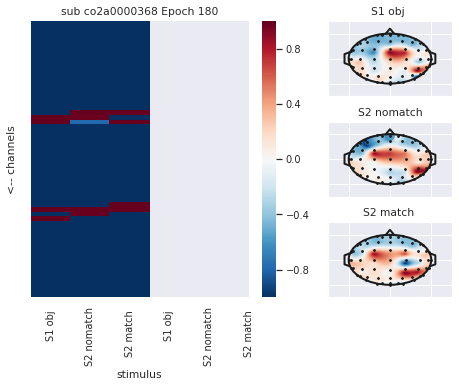

In [0]:
''' PLOT 1 for epoch 180 '''

os.chdir('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN/Plots')
heatmap_headmap(al_df,sensors,180)

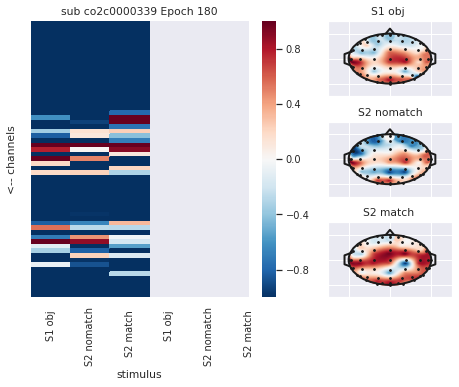

In [0]:
heatmap_headmap(co_df,sensors,180)

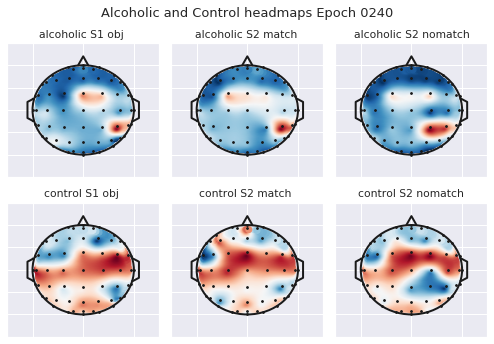

In [0]:
headmap_stacked(al_df,co_df,sensors,240)

## CORRELATIONS

As can be seen from the slideshow, some channels appear to be more correlated than others. A correlation is an indication that those two parts of the brain fire together. It is important to know whether this characteristic show any marked differences in alcoholic and control group.

In [0]:
def create_chanMat(df_obj,stimulus):
    """This function takes a dataframe object containing data about
        one subject and creates a voltage matrix for one stimulus"""
    chan_names = df_obj.chan_name.unique()   
    chan_volts = pd.DataFrame()
    stimuli_df = df_obj.loc[df_obj['stimulus'] == stimulus]
    for chan in chan_names:
        norm_voltage = []
        voltages = []  
        chan_df = pd.DataFrame()
        chan_df = stimuli_df.loc[stimuli_df['chan_name'] == chan]
        norm_voltages = chan_df[['norm_voltage']].values
        norm_voltage = np.concatenate(norm_voltages, axis=0)
        chan_volts[chan] = pd.Series(norm_voltage)
        
    return chan_volts

In [0]:
chanMat_al = create_chanMat(al_df,'S1 obj ')
chanMat_co = create_chanMat(co_df,'S1 obj ')
chanMat_al.head(10)

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,FC5,FC2,FC1,T8,T7,CZ,C3,C4,CP5,CP6,CP1,CP2,P3,P4,PZ,P8,P7,PO2,PO1,O2,O1,X,AF7,AF8,F5,F6,FT7,FT8,FPZ,FC4,FC3,C6,C5,F2,F1,TP8,TP7,AFZ,CP3,CP4,P5,P6,C1,C2,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,0.911321,0.345085,1.000000,-0.296708,1.000000,0.545073,0.854632,0.524820,0.784400,0.072029,0.931171,0.231918,1.000000,-0.022311,0.341172,0.0,0.617244,-0.497082,0.357415,-0.608185,0.105617,0.121703,0.058899,0.131826,-0.025324,0.075189,0.125814,0.000000,-0.006106,0.114457,-0.126429,0.025846,-1.0,0.591467,-0.186667,0.475847,-0.039293,0.020370,0.126786,1.000000,1.000000,0.324100,-1.00000,-1.000000,0.0,0.368693,0.368693,1.000000,1.000000,0.478632,0.630862,0.356616,0.293353,0.350598,0.502583,0.102643,0.434682,-0.065507,0.0,0.0,-0.158621,-1.0,0.0,0.440241
1,1.000000,0.812799,0.456468,0.005067,0.880363,1.000000,1.000000,0.810006,0.568948,0.188008,0.517913,1.000000,0.794958,-0.022311,0.623554,0.0,-0.105220,0.052065,-0.061342,-0.167319,-0.120666,-0.037456,-0.025135,-0.058854,-0.086327,-0.007790,0.046387,-0.117697,-0.064535,-0.035956,-0.174933,0.335812,-1.0,0.387200,-0.186667,0.101365,-1.000000,-0.179905,0.126786,0.411807,0.076749,-0.341857,-1.00000,-1.000000,0.0,0.368693,0.368693,1.000000,1.000000,0.478632,0.261725,0.099104,-1.000000,-1.000000,-0.073477,-0.434949,1.000000,-0.107960,0.0,0.0,-0.158621,-1.0,0.0,0.580109
2,0.733963,0.719295,-0.039494,0.354610,0.521206,0.772420,0.563598,0.714814,0.281383,0.234428,0.035825,0.615566,0.179412,-0.115465,0.529491,0.0,-0.018620,-0.217727,0.100408,0.022815,-0.120666,-0.037456,-0.025135,-0.058854,-0.147206,-0.049111,-0.076957,-0.235273,-0.064535,-0.086667,-0.126429,0.468668,-1.0,-0.099183,-0.186667,-0.151564,-0.039293,-0.131693,0.126786,-0.069728,-0.057395,-0.341857,-1.00000,-1.000000,0.0,-0.293353,0.368693,0.591384,0.414868,0.478632,0.261725,-0.067408,-1.000000,-1.000000,0.324965,0.064440,-0.005847,-0.235407,0.0,0.0,-0.158621,-1.0,0.0,0.300373
3,0.378884,0.251389,-0.113386,0.650402,0.042412,0.203820,0.127197,0.334631,0.065931,0.234428,-0.160228,-0.024107,-0.053223,-0.115465,-0.054157,0.0,-0.105220,0.526032,-0.317372,-0.608185,-0.120666,-0.037456,-0.082452,-0.184271,-0.269087,-0.255800,-0.131228,-0.470546,-0.122965,-0.289619,-0.223437,0.424322,-1.0,-0.399455,-0.186667,-0.314755,-0.039293,0.020370,0.126786,-0.069728,0.076749,-0.341857,0.02008,-1.000000,-1.0,-0.293353,-0.076749,-0.026856,-0.126899,-0.009245,0.261725,-0.286822,-1.000000,-1.000000,-0.536738,-0.732367,-0.031323,-0.362853,0.0,0.0,-0.158621,-1.0,0.0,-0.088874
4,0.023987,-0.073844,0.021487,0.838639,-0.022521,-0.087578,-0.058792,-0.022311,0.065931,0.211194,0.035825,-0.146140,-0.053223,0.014244,-0.251251,0.0,0.043174,-0.552987,0.293196,0.179155,-0.193907,-0.165725,-0.139770,-0.372526,-0.451722,-0.462574,-0.131228,-0.705819,-0.298372,-0.543386,-0.320545,0.247211,-1.0,-0.399455,0.434682,-0.216854,-0.039293,0.246451,0.126786,0.176386,0.630624,0.324100,0.02008,-1.000000,-1.0,0.368693,-0.076749,-0.099851,-0.126899,-0.009245,0.261725,-0.451410,0.293353,0.350598,0.289384,0.159889,-0.056800,-0.490300,0.0,0.0,-0.158621,-1.0,0.0,-0.232741
5,0.023987,-0.137746,0.347695,0.731083,-0.022521,-0.127305,-0.058792,-0.115465,0.137748,0.188008,0.242454,-0.268049,-0.005914,0.151189,-0.251251,0.0,0.011300,0.569096,-0.231999,0.687320,-0.193907,-0.294125,-0.197087,-0.560781,-0.512725,-0.545216,-0.022576,-0.823515,-0.415350,-0.746337,-0.417553,0.070101,-1.0,-0.142054,0.434682,0.026530,-0.039293,0.095833,0.126786,0.411807,0.815501,0.324100,0.02008,-1.000000,0.0,-0.293353,-0.076749,-0.099851,-0.126899,-0.009245,-0.126899,-0.670824,0.293353,0.350598,-0.047702,-0.107809,-0.056800,-0.575207,0.0,0.0,-0.158621,-1.0,0.0,-0.280664
6,0.112848,-0.073844,0.293365,0.354610,0.042412,-0.047932,0.127197,-0.022311,0.137748,0.118402,0.380254,-0.207095,0.384874,0.178555,-0.014770,0.0,-0.220666,-0.105917,-0.018700,-0.461230,-0.193907,-0.358260,-0.197087,-0.686327,-0.451722,-0.545216,0.046387,-0.764727,-0.415350,-0.797049,-0.417553,0.025846,-1.0,0.114891,-0.186667,0.4

**Create a correlation matrix to show the correlations between different channel for a single stimulus. Here the correlations of an alcoholic subject for 'S1 obj' stimulus is shown. Also printed out are the top 5 channel pairs with highest correlation index.**

PO1  O1     0.953547
P3   PO1    0.951427
CP2  P4     0.946061
PO2  PO1    0.942262
P4   P8     0.942232
dtype: float64

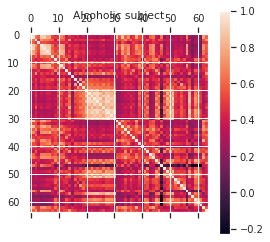

In [0]:
plt.matshow(chanMat_al.corr())
plt.colorbar()
plt.title('Alcoholic subject')
plt.tight_layout
labels_to_drop = set()
cols = chanMat_al.columns
for ii in range(0, chanMat_al.shape[1]):
    for jj in range(0, ii+1):
        labels_to_drop.add((cols[ii], cols[jj]))
top_corr = chanMat_al.corr().abs().unstack()
top_corr = top_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr[:5]

FP1  nd     0.997574
FP2  FPZ    0.957878
F3   F1     0.950767
FZ   F1     0.949471
AF2  AFZ    0.945497
dtype: float64

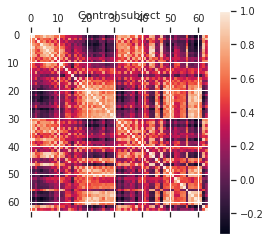

In [0]:
plt.matshow(chanMat_co.corr())
plt.colorbar()
plt.title('Control subject')
labels_to_drop = set()
cols = chanMat_co.columns
for ii in range(0, chanMat_al.shape[1]):
    for jj in range(0, ii+1):
        labels_to_drop.add((cols[ii], cols[jj]))
top_corr = chanMat_co.corr().abs().unstack()
top_corr = top_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr[:5]

**Indeed,there is a clear difference in correlation between the alcoholics and control group. However this is for a single stimulus. Using networkx a graph can be constructed to better portray the correlations between different channels.**

# FOR ALL SUBJECTS

In [0]:
'''
Now we take a look at the entire dataset to see whether a substantial difference could be spotted between alcoholics and control. 
Let us create a function to randomly pick n number of files each from alcoholics subject group and control subject group.
'''

import random
def random_pickr(n_files,str_id):
    """
        This function will return a randomly collected sample of user defined number
        of files to be used in the analyis."""
    if str_id =='a':
        pkl_files_ = [file for file in glob.glob(main_dir+'co?a*_full.pkl')]
    elif str_id =='c':
        pkl_files_ = [file for file in glob.glob(main_dir+'co?c*_full.pkl')]
    else:
        print('No such group. Exiting.')
        return None
    
    random_idx = random.sample(range(0, len(pkl_files_) - 1),n_files)
    group_files_ = [pkl_files_[idx] for idx in random_idx ]
    return group_files_



al_files_ = random_pickr(8,'a')
co_files_ = random_pickr(8,'c')



We start with counting the pairs and then adding the frequency score to that particular channel. In the end we pass this score array containing number of correlations to the function for plotting headmaps.

In [0]:
def create_graph(df_mat,cutoff):
    corr_df = df_mat.corr()
    indices = np.where(corr_df>cutoff)
    indices = [(corr_df.index[x],corr_df.columns[y]) for x,y in zip(*indices)
                                        if x!=y and x<y ]
    return indices

In [0]:
def collect_corrs(df_obj_,cutoff,stimulus):
    """
        Function to create correlation pairs for plotting.
    """
    chanMat_ = create_chanMat(df_obj_, stimulus)
    chan_idx = create_graph(chanMat_,cutoff)
    corrs = []
    for pair in chan_idx:
        corrs.append(pair[0]+'_'+pair[1])
        
    return corrs

In [0]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
chan_names = sensors.chan_name.unique()
volt_al = np.zeros([61,3])
volt_co = np.zeros([61,3])
for kk in range(3):
    row = kk // 3
    col = kk % 3
    _corrs_list_1 = []
    _corrs_list_2 = []
    print('stimulus ',stimuli[kk])
    for file1,file2 in zip(al_files_,co_files_):
        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        _corrs_list_1 = _corrs_list_1 + collect_corrs(df_1,0.9,stimuli[kk])
        _corrs_list_2 = _corrs_list_2 + collect_corrs(df_2,0.9,stimuli[kk])
    print('all pairs collected')
    counts_al = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_1)]
    counts_co = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_2)]
    for count1,count2 in zip(counts_al,counts_co):
        if not any(ele for ele in['X','Y','nd'] if ele in count1[0]):
            chan_id1 = count1[0].split('_')
            volt_al[list(chan_names).index(chan_id1[0]),kk] = volt_al[list(chan_names).
                                                                        index(chan_id1[0]),kk] + count1[1]
            volt_al[list(chan_names).index(chan_id1[1]),kk] = volt_al[list(chan_names).
                                                                        index(chan_id1[1]),kk] + count1[1]
        if not any(ele for ele in['X','Y','nd'] if ele in count2[0]):
            chan_id2 = count2[0].split('_')
            volt_co[list(chan_names).index(chan_id2[0]),kk] = volt_co[list(chan_names).
                                                                        index(chan_id2[0]),kk] + count2[1]
            volt_co[list(chan_names).index(chan_id2[1]),kk] = volt_co[list(chan_names).
                                                                        index(chan_id2[1]),kk] + count2[1]

stimulus  S1 obj 
all pairs collected
stimulus  S2 match 
all pairs collected
stimulus  S2 nomatch
all pairs collected


Plotting the results

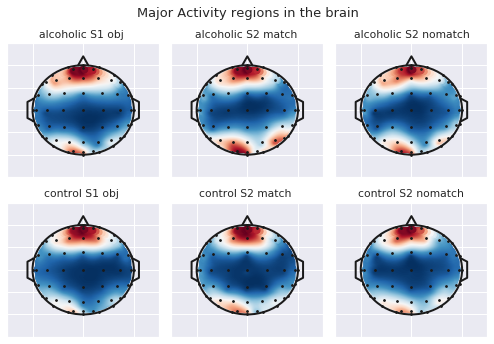

In [0]:
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
fig,axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
for idx in range(6):
    row = idx// 3
    col = idx % 3
    if row >= 1:
        mask,xi,yi,zi = interpolate_mesh(sensors,volt_co[:,col])
        snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'control '+stimulus[col],sensors)
    elif row < 1:
        mask,xi,yi,zi = interpolate_mesh(sensors,volt_al[:,col])
        snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'alcoholic '+stimulus[col],sensors)
        
        
fig.suptitle('Major Activity regions in the brain')       
fig.tight_layout(rect=[0,0.03,1,0.95])

The headmaps in the above plot is not representing averages but the **regions of brain with maximum correlations**. Red being high and blue been low. This can be interpreted as the major activity regions in the brain. For control subjects we see in general across the three stimuli that the brain activity is higher.

We find the correlations are different for alcoholics and control subjects. We also saw earlier that once you take average across all the epochs we fail to see significant difference in the voltage distributions of alcoholics and control. So now we are going to analyze the voltage distribution over certain epochs and see if they are any different for the two groups.


**alcoholics and control subjects show different 'pronounced' correlations and distinguishable mean voltages corresponding to certain epochs**

Since reading each file individually for further analysis take up lot of computation resources, we will create a multi-dimensional array to store the voltages from the these subjects.
Create mean arrays for each of the 10 subjects. This data will be used to analysis of the p values and later to run ML algorithms.


In [0]:
def create_meanArr(stimuli,chan_names,epochs,alFiles,coFiles):
    mean_arr1 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(alFiles)))
    mean_arr2 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(coFiles)))
    for idx,(file1,file2) in tqdm_notebook(enumerate(zip(alFiles,coFiles)),desc='Files completed',total=len(alFiles)):
            
        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        #print('loading file '+file1+' '+file2)
        for ll,stimulus in enumerate(stimuli):
            for jj,chanel in enumerate(chan_names):

                for ii,epoch in enumerate(epochs):
                    voltages_mean1 = df_1.loc[(df_1['chan_name']== chanel)&(df_1['stimulus']== stimulus)&
                                            (df_1['epoch']==epoch)]['voltage'].mean()
                    voltages_mean2 = df_2.loc[(df_2['chan_name']== chanel)&(df_2['stimulus']== stimulus)&
                                            (df_2['epoch']==epoch)]['voltage'].mean()
                    mean_arr1[ll,ii+(jj*len(epochs)),idx] = voltages_mean1
                    mean_arr2[ll,ii+(jj*len(epochs)),idx] = voltages_mean2
                    
    return mean_arr1,mean_arr2

In [0]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
chan_names = ['FPZ','AFZ','AF1','FCZ','CPZ','PZ','P1','PO2','OZ','nd']
epochs = [5,10,20,30,60,80,100,140,160,170,180,200,240]
no_files = 8
multiD_arr_al,multiD_arr_co  = create_meanArr(stimuli,chan_names,epochs,al_files_,co_files_)

In [0]:
''' Save this array for future use so that we don't have to run this expensive computation again. '''
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save('multiD_arr_al',multiD_arr_al)
np.save('multiD_arr_co',multiD_arr_co)

# LOGISTIC REGRESSION

Since alcoholics and control subjects show different 'pronounced' correlations and distinguishable mean voltages corresponding to certain epochs, let's see if we can predict subject behaviour just by looking at their eeg scans. For that we need to create feature vectors which will do a good job in differentiating the two categories.

In [0]:
def prominent_pairs(alFiles,coFiles,stimuli):
    al_pairs = []
    co_pairs = []
    for kk in range(3):
        _corrs_list_1 = []
        _corrs_list_2 = []
        for file1,file2 in zip(alFiles,coFiles):
            df_1 = pd.read_pickle(file1)
            df_2 = pd.read_pickle(file2)
            _corrs_list_1 = _corrs_list_1 + collect_corrs(df_1,0.9,stimuli[kk])
            _corrs_list_2 = _corrs_list_2 + collect_corrs(df_2,0.9,stimuli[kk])
        counts_al = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_1)]
        counts_co = [[x,_corrs_list_2.count(x)] for x in set(_corrs_list_2)]
        
        al_pairs.append([pair[0] for pair in counts_al if pair[1]>=5])
        co_pairs.append([pair[0] for pair in counts_co if pair[1]>=5])
    print('All complete.')   
    return al_pairs,co_pairs

In [0]:
def stack_meanVolt(subject_file,mean_arr,stimulus_epochs,stimulus_chans,stimuli_pairs,file_id):
    """
        Function to extract mean volts and correlation for a single stimuli. This function will
        be recursively called to create feature vectors for a subject.
    """
    stimuliName = ['S1 obj ', 'S2 match ','S2 nomatch']
    full_epochs = epochs = [5,10,20,30,60,80,100,140,160,170,180,200,240]
    full_chans = ['FPZ','AFZ','AF1','FCZ','CPZ','PZ','P1','PO2','OZ','nd']
    row_values = []
    for s_id,stimulus in enumerate(stimuliName):
        epochs = stimulus_epochs[s_id]
        channels = stimulus_chans[s_id]
        pairs = stimuli_pairs[s_id]
        for chanel in channels:
            chan_id = full_chans.index(chanel)
            for epoch in epochs :
                epoch_id = full_epochs.index(epoch)
                voltages_mean = mean_arr[s_id,epoch_id+(chan_id*len(full_epochs)),file_id].tolist()
                row_values.extend([voltages_mean])
            
        chanMat_ = create_chanMat(pd.read_pickle(subject_file),stimulus)
        for pair in pairs:
            row_values.extend([chanMat_.corr().at[pair.split('_')[0],pair.split('_')[1]]])
        
    return row_values

In [0]:
def create_featureVecs(subject_files,mean_array_of_sub,sub_group,al_pairs,co_pairs):
    """
        This function will create feature vectors for each individual subjects and append the row
        to a 2D numpy array. The epochs and channels for which the data need to be collected is separately
        defined for each stimulus."""
    s1_epochs = [5,10,30,60,80,100,170]
    s1_chans = ['FCZ','CPZ','PZ','P1','PO2','OZ']
    s2_epochs = [5,10,30,60,80,100,140,160,170,240]
    s2_chans = ['FPZ','AFZ','AF1','FCZ','PZ','P1','PO2']
    s3_epochs = [5,10,60,80,100,140,160]
    s3_chans = ['FPZ','AFZ','FCZ','CPZ','PZ','P1','PO2','OZ']
    s_chans = [s1_chans,s2_chans,s3_chans]
    s_epochs = [s1_epochs,s2_epochs,s3_epochs]
    s_pairs=[list(set(al_pairs[0]+co_pairs[0])), list(set(al_pairs[1]+co_pairs[1])), list(set(al_pairs[2]+co_pairs[2]))]
    feature_vecLen = 0
    for pairs,chans,epochs in zip(s_pairs,s_chans,s_epochs):
        feature_vecLen += len(pairs)+len(chans)*len(epochs)

    feature_vectors = np.zeros([len(subject_files),feature_vecLen])
    
    for idx,file in tqdm_notebook(enumerate(subject_files),desc='Files completed',total = len(subject_files)):

        arr = stack_meanVolt(file, mean_array_of_sub, s_epochs,s_chans,s_pairs,idx)
        feature_vectors[idx,:] = arr
        
    if sub_group == 'a':
        feature_vectors = np.c_[feature_vectors, np.ones(len(subject_files))]
    elif sub_group == 'c':
        feature_vectors = np.c_[feature_vectors, np.zeros(len(subject_files))]
        
    return feature_vectors

In [0]:
''' CREATE FEATURE VECTORS '''

stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
al_pairs,co_pairs = prominent_pairs(al_files_,co_files_,stimulus)

All complete.


In [0]:
feature_vector_al = create_featureVecs(al_files_,multiD_arr_al,'a',al_pairs,co_pairs)
feature_vector_co = create_featureVecs(co_files_,multiD_arr_co,'c',al_pairs,co_pairs)
np.save('featureVec_al',feature_vector_al)
np.save('featureVec_co',feature_vector_co)

In [0]:
feature_vector_al = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN/Plots/featureVec_al.npy')
feature_vector_co = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CMI_TRAIN/Plots/featureVec_co.npy')


In [0]:
''' IMPORTING NECESSARY LIBRARIES '''

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [0]:
'''
Create training array by taking 20 entries each from alcoholics and control, while test array will have 10 each from each group.

Thus training set will have 40 entries and test set will have 20 entries.
'''

# Stack feature vectors of alcoholics and controls and separate out the target vectors.

X = np.vstack((feature_vector_al[:,:-1],feature_vector_co[:,:-1]))
y = np.hstack((feature_vector_al[:,-1],feature_vector_co[:,-1]))

X_ = np.nan_to_num(X)  # precaution to remove any nan values.

# split into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.2 , random_state = 0)

In [0]:
print('Dimension of training dataset - {} rows {} columns'.format(X_train.shape[0],X_train.shape[1]))
print('Dimension of test dataset - {} rows {} columns'.format(X_test.shape[0],X_test.shape[1]))

Dimension of training dataset - 12 rows 291 columns
Dimension of test dataset - 4 rows 291 columns


In [0]:
scaler = preprocessing.StandardScaler()     # use feature-scaling to standardize values.
X_ = scaler.fit_transform(X_)

In [0]:
'''

Since the data is less, we do a cross-validation exercise to prevent tuning of hyperparameters. 

Cross-val score method of doing cross-valuation.

'''

from sklearn.model_selection import cross_val_score
clf = linear_model.LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_macro') #balance target classes
print('Accuracy: %0.2f(+/- %0.2f)' % (scores.mean(),scores.std()*2))

Accuracy: 0.73(+/- 0.00)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
'''
Using stratified cross validation because we don't want our model to train on an unbalanced mix of labels.

'''

skf = StratifiedKFold(n_splits=2,shuffle=True)   
acc = np.array([])               # take n folds
for train_idx, test_idx in skf.split(X_train,y_train):
    X_train_cv,X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv,y_test_cv = y_train[train_idx], y_train[test_idx]
    clf = linear_model.LogisticRegression()
    clf.fit(X_train_cv,y_train_cv)
    y_pred = (clf.predict(X_test_cv))
    acc = np.append(acc,metrics.accuracy_score(y_test_cv,y_pred))
print('Accuracy: %0.2f(+/- %0.2f)' %(acc.mean(),acc.std()*2))

Accuracy: 0.58(+/- 0.17)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
''' Let's use this classifer to label the test set. '''

y_ = clf.predict(X_test)
print('Accuracy for test set is: {:.2}'.format(metrics.accuracy_score(y_test,y_)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test,y_)))


Accuracy for test set is: 0.75
Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4




In [0]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_))

print("F1 score:",metrics.f1_score(y_test, y_))

Precision: 0.6666666666666666
Recall: 1.0
F1 score: 0.8


Text(0.5, 1, 'Confusion Matrix')

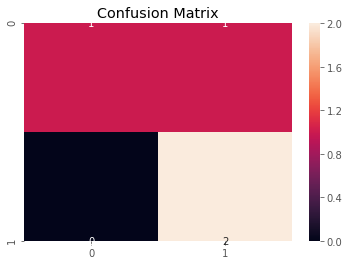

In [0]:
'''
Due to very less data size,
On plotting the confusion matrix we see that the model performs averagly in figuring out control subjects in comparison to alcoholics.
'''

logistics_conf_mat = metrics.confusion_matrix(y_test,y_)
sns.heatmap(logistics_conf_mat, annot=True)
plt.title('Confusion Matrix')

# Support Vector Machine Classification

In [0]:
X = np.vstack((feature_vector_al[:,:-1],feature_vector_co[:,:-1]))
y = np.hstack((feature_vector_al[:,-1],feature_vector_co[:,-1]))

X_ = np.nan_to_num(X)  # precaution to remove any nan values.

# split into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.3 , random_state = 6)

In [0]:
print('Dimension of training dataset - {} rows {} columns'.format(X_train.shape[0],X_train.shape[1]))
print('Dimension of test dataset - {} rows {} columns'.format(X_test.shape[0],X_test.shape[1]))

Dimension of training dataset - 11 rows 291 columns
Dimension of test dataset - 5 rows 291 columns


In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', C=0.6, degree=5) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 1.0
F1 score: 0.8571428571428571


**Therefore, using such a small dataset gives us an averagely well performing classification. To further prove our hypothesis, we will run it on the full compressed dataset.**

# Random Forest

In [0]:
from sklearn.model_selection import train_test_split

X = np.vstack((feature_vector_al[:,:-1],feature_vector_co[:,:-1]))
y = np.hstack((feature_vector_al[:,-1],feature_vector_co[:,-1]))

X_ = np.nan_to_num(X)  # precaution to remove any nan values.

# split into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.2 , random_state = 10)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=175, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Actual class predictions
y_pred = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.75
Precision: 1.0
Recall: 0.6666666666666666
F1 score: 0.8


# **USING THE FULL DATASET**

Consists of 77 Alcoholic subjects and 45 Control subjects

In [0]:
X_train = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/FULL_DATASET/X_train.npy')
X_test = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/FULL_DATASET/X_test.npy')
y_train = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/FULL_DATASET/y_train.npy')
y_test = np.load('/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/FULL_DATASET/y_test.npy')

In [0]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (7897, 16384)
y_train:  (7897,)
X_test:  (3160, 16384)
y_test:  (3160,)


## 1. Logistic Regression


In [0]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
